tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])


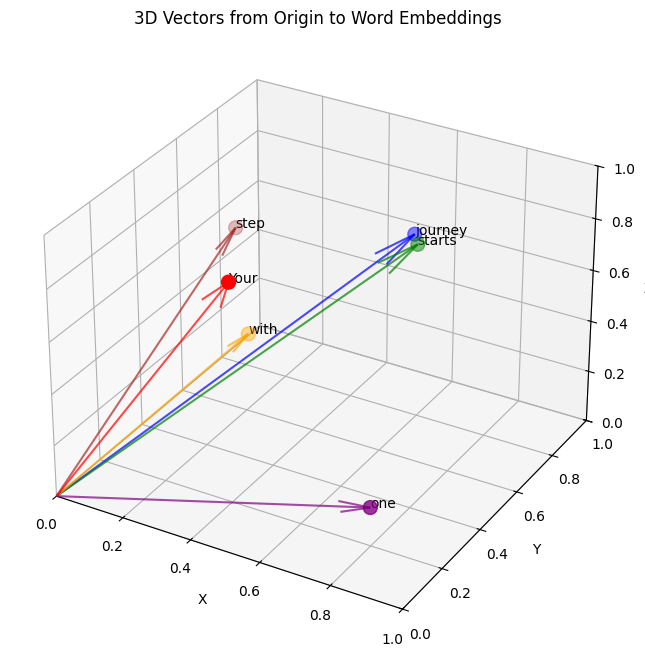

In [1]:
# simiplified attention

import torch

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

print(inputs)

# plot it on matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))

# plot the input vectors along with words
words = ['Your', 'journey', 'starts', 'with', 'one', 'step']
ax = fig.add_subplot(111, projection='3d')

# Define colors for each vector
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']

# Plot the points with different colors
ax.scatter(inputs[:, 0], inputs[:, 1], inputs[:, 2], c=colors, marker='o', s=100)

# Create 3D vectors from origin to each point with different colors
for i in range(len(inputs)):
    # Draw vector from origin to each point with unique color
    ax.quiver(0, 0, 0, 
              inputs[i, 0], inputs[i, 1], inputs[i, 2], 
              color=colors[i], alpha=0.7, arrow_length_ratio=0.1)

# set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# add word annotations
for i, word in enumerate(words):
    ax.text(inputs[i, 0], inputs[i, 1], inputs[i, 2], word, fontsize=10)

# Set equal aspect ratio for better visualization
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

# show the plot
plt.title('3D Vectors from Origin to Word Embeddings')
plt.show()


In [2]:
# finding dot product for second x as query 

query = inputs[1]

attention_scores_2 = torch.empty(inputs.shape[0])

# calculate the dot product of query and all the inputs
for i in range(len(inputs)):
    attention_scores_2[i] = torch.dot(query, inputs[i])

print(attention_scores_2)

def softmax_naive(x):
    return torch.exp(x) / torch.exp(x).sum(dim=0)

attn_weights_naive_2 = softmax_naive(attention_scores_2)

sum = torch.sum(attn_weights_naive_2)

print("Attention weights:", attn_weights_naive_2)
print("Sum of attention weights:", sum)


tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])
Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum of attention weights: tensor(1.)


attn_weights_naive_2[i] tensor(0.1385)
x_i tensor([0.4300, 0.1500, 0.8900])
attn_weights_naive_2[i] tensor(0.2379)
x_i tensor([0.5500, 0.8700, 0.6600])
attn_weights_naive_2[i] tensor(0.2333)
x_i tensor([0.5700, 0.8500, 0.6400])
attn_weights_naive_2[i] tensor(0.1240)
x_i tensor([0.2200, 0.5800, 0.3300])
attn_weights_naive_2[i] tensor(0.1082)
x_i tensor([0.7700, 0.2500, 0.1000])
attn_weights_naive_2[i] tensor(0.1581)
x_i tensor([0.0500, 0.8000, 0.5500])
context_vec_2 tensor([0.4419, 0.6515, 0.5683])
tensor([0.4419, 0.6515, 0.5683])


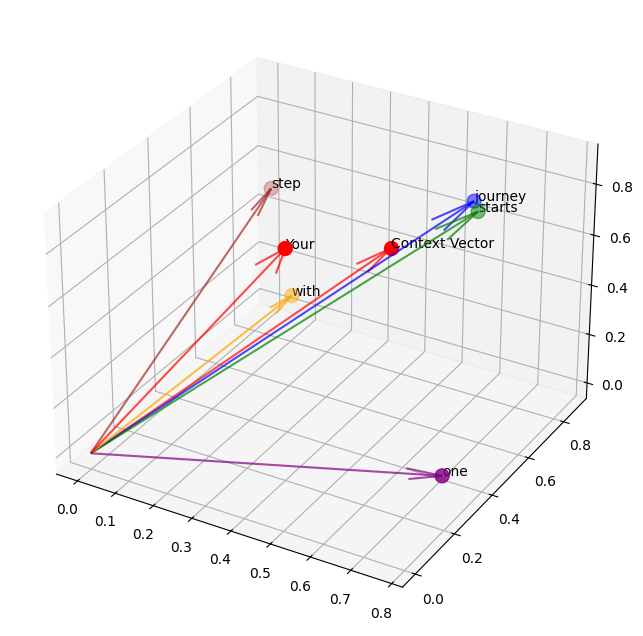

In [3]:
context_vec_2 = torch.zeros(query.shape[0])
for i, x_i in enumerate(inputs):
    print("attn_weights_naive_2[i]", attn_weights_naive_2[i])
    print("x_i", x_i)
    context_vec_2 += attn_weights_naive_2[i] * x_i
print("context_vec_2", context_vec_2)

context_vector_2 = torch.sum(inputs * attn_weights_naive_2.unsqueeze(1), dim=0)

print(context_vector_2)

# plot the context vector and all the inputs with text arrow from origin to context vector
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(inputs[:, 0], inputs[:, 1], inputs[:, 2], c=colors, marker='o', s=100)
ax.scatter(context_vector_2[0], context_vector_2[1], context_vector_2[2], c='red', marker='o', s=100)

# draw arrow from origin to context vector
ax.quiver(0, 0, 0, context_vector_2[0], context_vector_2[1], context_vector_2[2], color='red', alpha=0.7, arrow_length_ratio=0.1)

# draw arrow from origin to each input
for i in range(len(inputs)):
    ax.quiver(0, 0, 0, inputs[i, 0], inputs[i, 1], inputs[i, 2], color=colors[i], alpha=0.7, arrow_length_ratio=0.1)

for i, word in enumerate(words):
    ax.text(inputs[i, 0], inputs[i, 1], inputs[i, 2], word, fontsize=10)

ax.text(context_vector_2[0], context_vector_2[1], context_vector_2[2], 'Context Vector', fontsize=10)

plt.show()


In [4]:
# calculate the dot product for all the inputs as queries
# calculate the attention score
# calculate the attention weights
# calculate the context vector

# do for all the inputs 
def attention_weights(inputs):
    attn_weights = torch.empty(6,6)
    for i in range(len(inputs)):
        query = inputs[i]
        # print("query_i", i)
        attention_scores_x = torch.empty(inputs.shape[0])
        for j in range(len(inputs)):
            attention_scores_x[j] = torch.dot(query, inputs[j])
            # print("attention_scores_x", attention_scores_x)
        attention_weights_x = torch.softmax(attention_scores_x, dim=0)
        # print("attention_weights_x", attention_weights_x)
        attn_weights[i] = attention_weights_x
    return attn_weights


print("inputs", inputs)
attn_weights = attention_weights(inputs)
print("attn_weights", attn_weights)


# better way to calculate attention score 
attn_scores = inputs @ inputs.T
print("attn_scores using matrix multiplication", attn_scores)

# attention weights = normalized attention scores
attn_weights = torch.softmax(attn_scores, dim=-1)
print("attn_weights using matrix multiplication", attn_weights)


inputs tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])
attn_weights tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])
attn_scores using matrix multiplication tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])
attn_weights using matrix multiplicat

In [5]:

# atten_weights dims 6x6
# inputs dims 6x3
# all_context_vectors dims 6x3
all_context_vectors = attn_weights @ inputs
print("all_context_vectors using matrix multiplication\n", all_context_vectors)



all_context_vectors using matrix multiplication
 tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


In [6]:
import torch
import torch.nn as nn

class SelfAttention_V1(nn.Module):
    def __init__(self, dim1, dim2):
        super().__init__()
        self.W_query = nn.Parameter(torch.rand(dim1, dim2))
        self.W_key = nn.Parameter(torch.rand(dim1, dim2))
        self.W_value = nn.Parameter(torch.rand(dim1, dim2))

    def forward(self, x):

        # x dims 6x3
        # W_query dims 3x2
        # query dims 6x2
        query = x @ self.W_query

        # x dims 6x3
        # W_key dims 3x2
        # key dims 6x2
        key = x @ self.W_key


        # x dims 6x3
        # W_value dims 3x2
        # value dims 6x2
        value = x @ self.W_value

        '''
        query sample : 
        [0.43, 0.15], # Your     (x^1)
        [0.55, 0.87], # journey  (x^2)
        [0.57, 0.85], # starts   (x^3)
        [0.22, 0.58], # with     (x^4)
        [0.77, 0.25], # one      (x^5)
        [0.05, 0.80] # step     (x^6)

        key sample diferent vallues : 
        [0.49, 0.18], # Your     (x^1)
        [0.52, 0.81], # journey  (x^2)
        [0.53, 0.85], # starts   (x^3)
        [0.29, 0.59], # with     (x^4)
        [0.78, 0.21], # one      (x^5)
        [0.05, 0.86] # step     (x^6)

        transpose key 
        [0.49, 0.52, 0.53, 0.29, 0.78, 0.05],
        [0.18, 0.81, 0.85, 0.59, 0.21, 0.86]

        query * key.T  = dot product = tries to find the similarity between the query and the key = attention score 

        [0.43, 0.15] 
        [0.55, 0.87]
        [0.57, 0.85]        *     [0.49, 0.52, 0.53, 0.29, 0.78, 0.05],
        [0.22, 0.58]              [0.18, 0.81, 0.85, 0.59, 0.21, 0.86]
        [0.77, 0.25]
        [0.05, 0.80]

        since every query (6) is multiplied by every key (6) we get a 6x6 matrix 
        '''

        # 6x2 * 2x6 = 6x6
        attn_score = query @ key.T

        # 6x6
        attn_weights = torch.softmax(attn_score / key.shape[-1]**0.5, dim=-1)

        
        '''
        # 6x6 * 6x2 = 6x2
        sample attention weights random values  * value 
        [0.10, 0.20, 0.15, 0.25, 0.20, 0.10]       [0.49, 0.18]
        [0.05, 0.60, 0.10, 0.10, 0.10, 0.05]       [0.52, 0.81]
        [0.30, 0.10, 0.20, 0.10, 0.20, 0.10]    *  [0.53, 0.85]
        [0.25, 0.15, 0.10, 0.30, 0.10, 0.10]       [0.29, 0.59]
        [0.10, 0.10, 0.10, 0.10, 0.50, 0.10]       [0.78, 0.21]
        [0.15, 0.15, 0.20, 0.10, 0.10, 0.30]       [0.05, 0.86]
       

         see attention weights like a scale of how much we should pay attention to each value  with respect to the query 

         for example: for x2, attention weights are [0.05, 0.60, 0.10, 0.10, 0.10, 0.05]
         for each value in the value vector, we multiply it by the attention weight and sum them up 
         [0.49, 0.18] * 0.05 
         [0.52, 0.81] * 0.60 
         [0.53, 0.85] * 0.10 
         [0.29, 0.59] * 0.10 
         [0.78, 0.21] * 0.10 
         [0.05, 0.86] * 0.05 

        this will give us a context vector in 2 dimension space telling us the context for each query 

        '''


        context_vector = attn_weights @ value

        return context_vector

torch.manual_seed(123)
self_attn_v1 = SelfAttention_V1(3, 2)

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)
context_vector = self_attn_v1(inputs)

print("context_vector", context_vector)



context_vector tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


In [7]:
# in V2 we use nn.Linear instead of nn.Parameter

class SelfAttention_V2(nn.Module):
    def __init__(self, d_in, d_out, qkv_bias=False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)

    def forward(self, x):
        query = self.W_query(x)
        key = self.W_key(x)
        value = self.W_value(x)
        
        attn_scores = query @ key.T
        attn_weights = torch.softmax(attn_scores / key.shape[-1]**0.5, dim=-1)
        context_vector = attn_weights @ value
        return context_vector


# test 
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

torch.manual_seed(789)
self_attn_v2 = SelfAttention_V2(3, 2)
context_vector = self_attn_v2(inputs)
print("context_vector", context_vector)





context_vector tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


In [8]:
# causal attention mask 

# 
class CausalAttention_V1(nn.Module):
    def __init__(self, d_in, d_out, qkv_bias=False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)

    def forward(self, x):
        query = self.W_query(x)
        key = self.W_key(x)
        value = self.W_value(x)
        
        attn_scores = query @ key.T

        # good way
        mask = torch.triu(torch.ones(attn_scores.shape[0], attn_scores.shape[1]), diagonal=1)
        attn_scores = attn_scores.masked_fill(mask.bool(), float("-inf"))
        print("attn_scores", attn_scores)

        # create a mask to prevent the model from attending to future tokens


        attn_weights = torch.softmax(attn_scores / key.shape[-1]**0.5, dim=-1)
        print("attn_weights", attn_weights)

        # causal attention mask  --- bad way
        # mask = torch.tril(torch.ones(attn_weights.shape[0], attn_weights.shape[1]))
        # new_attn_weights = attn_weights * mask
        # print("new_attn_weights", new_attn_weights)
        
        context_vector = attn_weights @ value
        return context_vector


# test 
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

torch.manual_seed(789)
causal_attn_v2 = CausalAttention_V1(3, 2)
causal_attn_v2(inputs)
# print("context_vector", context_vector1)

attn_scores tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)
attn_weights tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


tensor([[-0.0872,  0.0286],
        [-0.0991,  0.0501],
        [-0.0999,  0.0633],
        [-0.0983,  0.0489],
        [-0.0514,  0.1098],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)

In [9]:
# dropout example
ones = torch.ones(6,6)
dropout = nn.Dropout(p=0.5)
dropout(ones)

tensor([[2., 2., 0., 0., 2., 2.],
        [0., 0., 2., 0., 0., 2.],
        [0., 0., 2., 2., 0., 0.],
        [2., 2., 0., 2., 2., 2.],
        [0., 2., 2., 0., 0., 0.],
        [2., 2., 0., 0., 0., 0.]])

In [10]:

# causal attention mask 

# 
class CausalAttention_V2(nn.Module):
    def __init__(self, d_in, d_out, context_length, qkv_bias=False, dropout=0.5):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.dropout = nn.Dropout(dropout)
        self.register_buffer("mask", torch.triu(torch.ones(context_length, context_length), diagonal=1))
        # self.mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)

    def forward(self, x):
        batch_size, num_tokens, d_in = x.shape
        print("batch_size", batch_size)
        print("num_tokens", num_tokens)
        print("d_in", d_in)
        query = self.W_query(x)
        key = self.W_key(x)
        value = self.W_value(x)
        
        attn_scores = query @ key.transpose(1,2) #1 = num_tokens, 2 = d_in

        # good way
        mask = torch.triu(torch.ones(attn_scores.shape[0], attn_scores.shape[1]), diagonal=1)
        attn_scores = attn_scores.masked_fill_(self.mask.bool()[:num_tokens, :num_tokens], -torch.inf)
        # print("attn_scores", attn_scores)

        # create a mask to prevent the model from attending to future tokens


        attn_weights = torch.softmax(attn_scores / key.shape[-1]**0.5, dim=-1)
        # print("attn_weights", attn_weights)

        attn_weights = self.dropout(attn_weights)

        # causal attention mask  --- bad way
        # mask = torch.tril(torch.ones(attn_weights.shape[0], attn_weights.shape[1]))
        # new_attn_weights = attn_weights * mask
        # print("new_attn_weights", new_attn_weights)
        
        context_vector = attn_weights @ value
        return context_vector

# handling batches of input
# test 
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

batch1 = torch.stack([inputs, inputs])
print("batch1 shape", batch1.shape)


torch.manual_seed(123)
causal_attn_v2 = CausalAttention_V2(3, 2, context_length=6, dropout=0.0)
context_vector_2 = causal_attn_v2(batch1)
print("context_vector", context_vector_2)



batch1 shape torch.Size([2, 6, 3])
batch_size 2
num_tokens 6
d_in 3
context_vector tensor([[[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5299, -0.1081]],

        [[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5299, -0.1081]]], grad_fn=<UnsafeViewBackward0>)


# Multihead Attention = stacking multiple causal attention 

In [11]:
class MultiheadAttentionWrapper(nn.Module):
    def __init__(self, d_in, d_out, num_heads, context_length, qkv_bias=False, dropout=0.5):
        super().__init__()
        self.heads = nn.ModuleList([CausalAttention_V2(d_in, d_out, context_length, qkv_bias, dropout) for _ in range(num_heads)])

    def forward(self, x):
        # concat the context vectors of all the heads along the column dimension 
        return torch.cat([head(x) for head in self.heads], dim=-1)


# try 
inputs = torch.tensor(
    [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

batch1 = torch.stack([inputs, inputs])

multihead_attn = MultiheadAttentionWrapper(3, 2, num_heads=2, context_length=6, dropout=0.0)
ctx_vec = multihead_attn(batch1)
print("ctx_vec", ctx_vec)


batch_size 2
num_tokens 6
d_in 3
batch_size 2
num_tokens 6
d_in 3
ctx_vec tensor([[[0.4772, 0.1063, 0.4566, 0.2729],
         [0.5891, 0.3257, 0.5792, 0.3011],
         [0.6202, 0.3860, 0.6249, 0.3102],
         [0.5478, 0.3589, 0.5691, 0.2785],
         [0.5321, 0.3428, 0.5543, 0.2520],
         [0.5077, 0.3493, 0.5337, 0.2499]],

        [[0.4772, 0.1063, 0.4566, 0.2729],
         [0.5891, 0.3257, 0.5792, 0.3011],
         [0.6202, 0.3860, 0.6249, 0.3102],
         [0.5478, 0.3589, 0.5691, 0.2785],
         [0.5321, 0.3428, 0.5543, 0.2520],
         [0.5077, 0.3493, 0.5337, 0.2499]]], grad_fn=<CatBackward0>)


In [16]:
class MultiheadAttention1(nn.Module):
    def __init__(self, d_in, d_out, num_heads, context_length, dropout, qkv_bias=False):
        super().__init__()

        # check if d_in is divisible by num_heads
        assert d_in % num_heads == 0, "d_in must be divisible by num_heads"

        self.d_in = d_in
        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads

        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.dropout = nn.Dropout(dropout)
        self.register_buffer("mask", torch.triu(torch.ones(context_length, context_length), diagonal=1))
        self.out_proj = nn.Linear(d_out, d_out)
    
    def forward(self, x):

        # x dims = batch_size, num_tokens, d_in
        b, num_tokens, d_in = x.shape
        q = self.W_query(x)         # batch_size, num_tokens, d_out
        k = self.W_key(x)           # batch_size, num_tokens, d_out
        v = self.W_value(x)         # batch_size, num_tokens, d_out

        # split the query, key and value into multiple heads
        q = q.view(b, num_tokens, self.num_heads, self.head_dim)
        k = k.view(b, num_tokens, self.num_heads, self.head_dim)
        v = v.view(b, num_tokens, self.num_heads, self.head_dim)

        # transpose the query to batch_size, num_heads, num_tokens, head_dim

        #  new dims = batch_size, num_heads, num_tokens, head_dim
        q = q.transpose(1, 2)
        k = k.transpose(1, 2)
        v = v.transpose(1, 2)
     
        # calculate the attention scores = num_tokens x num_tokens
        attention_scores = q @ k.transpose(2, 3)

        # apply the mask to the attention scores
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]
        attention_scores.masked_fill_(mask_bool, -torch.inf)

        # apply the softmax to the attention scores
        attention_weights = torch.softmax(attention_scores / self.head_dim**0.5, dim=-1)    

        # drop out the attention weights
        attention_weights = self.dropout(attention_weights)

        # calculate the context vector
        # attention_weights dims = batch_size, num_heads, num_tokens, num_tokens
        # v dims = batch_size, num_heads, num_tokens, head_dim

        # new dims = batch_size, num_heads, num_tokens, head_dim
        context_vector = attention_weights @ v

        # new dims = batch_size, num_tokens, num_heads, head_dim
        context_vector = context_vector.transpose(1, 2)

        # merge the heads
        # new dims = batch_size, num_tokens, d_out
        context_vector = context_vector.contiguous().view(b, num_tokens, self.d_out)

        # project the context vector to the output dimension
        # new dims = batch_size, num_tokens, d_out
        context_vector = self.out_proj(context_vector)

        return context_vector


# test 
torch.manual_seed(123)

# Define the tensor with 3 rows and 6 columns
inputs = torch.tensor(
    [[0.43, 0.15, 0.89, 0.55, 0.87, 0.66],  # Row 1
     [0.57, 0.85, 0.64, 0.22, 0.58, 0.33],  # Row 2
     [0.77, 0.25, 0.10, 0.05, 0.80, 0.55]]  # Row 3
)
batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)

batch_size, context_length, d_in = batch.shape
d_out = 6
mha = MultiheadAttention1(d_in, d_out, num_heads=2, context_length=6, dropout=0.0, qkv_bias=False)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)  

torch.Size([2, 3, 6])
tensor([[[ 0.1569, -0.0873,  0.0210,  0.0215, -0.3243, -0.2518],
         [ 0.1117, -0.0547,  0.0406, -0.0213, -0.3251, -0.2993],
         [ 0.1196, -0.0491,  0.0318, -0.0635, -0.2788, -0.2578]],

        [[ 0.1569, -0.0873,  0.0210,  0.0215, -0.3243, -0.2518],
         [ 0.1117, -0.0547,  0.0406, -0.0213, -0.3251, -0.2993],
         [ 0.1196, -0.0491,  0.0318, -0.0635, -0.2788, -0.2578]]],
       grad_fn=<ViewBackward0>)
context_vecs.shape: torch.Size([2, 3, 6])
